In [2]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

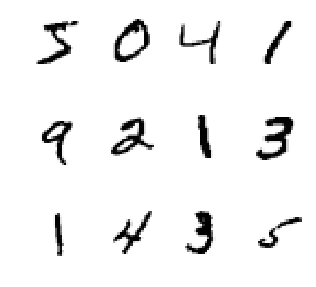

In [4]:
plt.figure(figsize = (5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap = 'Greys')
    plt.axis('off')

plt.show()

In [5]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
type(X_train)

numpy.ndarray

### Preprocessing the Data

In [6]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')

In [7]:
#Converting the values(pixel) in range 0 to 1
X_train /= 255
X_test /= 255

In [8]:
X_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Designing the Nueral Network Model

In [11]:
model = Sequential()

#Hidden Layers
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation = 'relu'))

#Output Layers
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


## For Classification type Problems Cross Entropy is the best kind of loss function

In [13]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1), metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4632 - accuracy: 0.8682 - val_loss: 0.2520 - val_accuracy: 0.9283
Epoch 2/20
469/469 [==============================] - 1s 1ms/step - loss: 0.2194 - accuracy: 0.9349 - val_loss: 0.1899 - val_accuracy: 0.9442
Epoch 3/20
469/469 [==============================] - 1s 1ms/step - loss: 0.1718 - accuracy: 0.9504 - val_loss: 0.1522 - val_accuracy: 0.9553
Epoch 4/20
469/469 [==============================] - 1s 1ms/step - loss: 0.1438 - accuracy: 0.9583 - val_loss: 0.1380 - val_accuracy: 0.9575
Epoch 5/20
469/469 [==============================] - 1s 1ms/step - loss: 0.1239 - accuracy: 0.9638 - val_loss: 0.1183 - val_accuracy: 0.9648
Epoch 6/20
469/469 [==============================] - 1s 1ms/step - loss: 0.1080 - accuracy: 0.9686 - val_loss: 0.1131 - val_accuracy: 0.9651
Epoch 7/20
469/469 [==============================] - 1s 1ms/step - loss: 0.0963 - accuracy: 0.9710 - val_loss: 0.1064 - val_accuracy: 0.9678
Epoch 

## we need to check the max accuracy based on the epochs so we get the best accuracy

In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 716us/step - loss: 0.1062 - accuracy: 0.9687


[0.10618449747562408, 0.9686999917030334]

In [16]:
Test = X_test[0].reshape(1, 784)

In [17]:
model.predict(Test)

array([[2.1091816e-07, 6.8081185e-09, 1.5716783e-05, 1.1854275e-05,
        1.5900210e-09, 4.3943585e-10, 1.3209514e-14, 9.9997044e-01,
        1.3113991e-07, 1.6346055e-06]], dtype=float32)

In [18]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [19]:
model.predict_classes(Test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7], dtype=int64)